# SMOTE

Tạo mẫu mới bằng phép ngoại suy các mẫu của lớp thiểu số và bất kỳ k neighbour gần nhất nào của nó (cũng từ lớp thiểu số). k thường là 5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [2]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

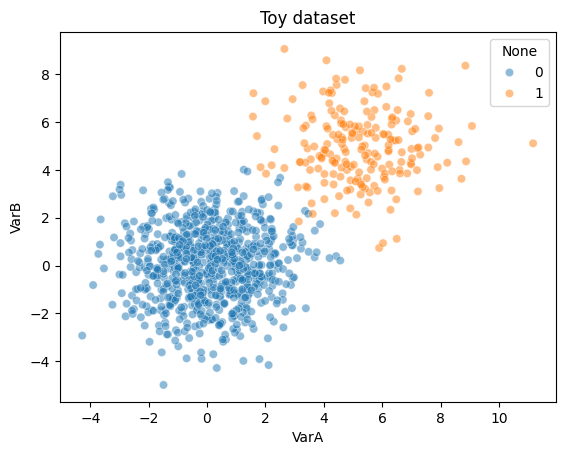

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## SMOTE

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [4]:
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
sm = SMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[SMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

</details>

In [5]:
# kích thước dữ liệu ban đầun đầun đầun đầun đầu

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [7]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 2
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

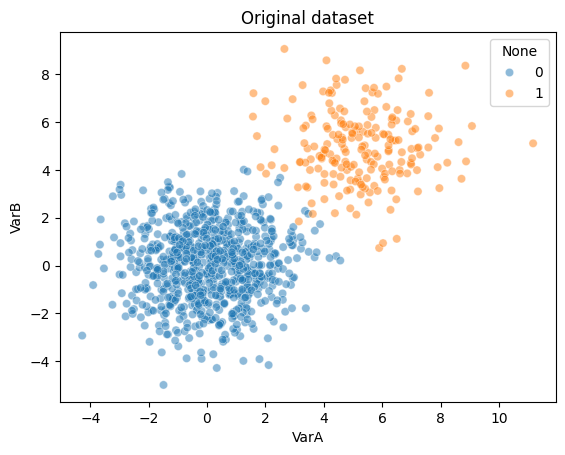

In [8]:
# biểu đồ dữ liệu ban đầu

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

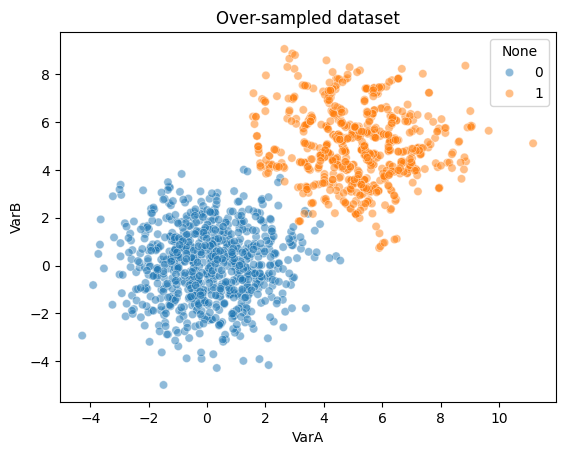

In [9]:
# biểu đồ dữ liệu đã chọn

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

Các quan sát mới khác với các quan sát ban đầu.

# SMOTE-NC

Mở rộng chức năng của SMOTE tới các biến hạng mục.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTENC

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [12]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
## Yêu cầu 3
## VIẾT CODE Ở ĐÂY:
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# thêm các đặc trưng hạng mục
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 4), (1000,))

<details><summary> Gợi ý </summary>

Sử dụng ```make_blobs()```

</details>

In [14]:
X.head()

,VarA,VarB,VarC,VarD
0,-2.520337,-1.394316,C,Green
2,-1.827059,0.584928,C,Blue
3,-0.689638,-0.031627,C,Red
5,-1.861008,0.992544,A,Green
7,-0.927956,-2.213217,B,Blue


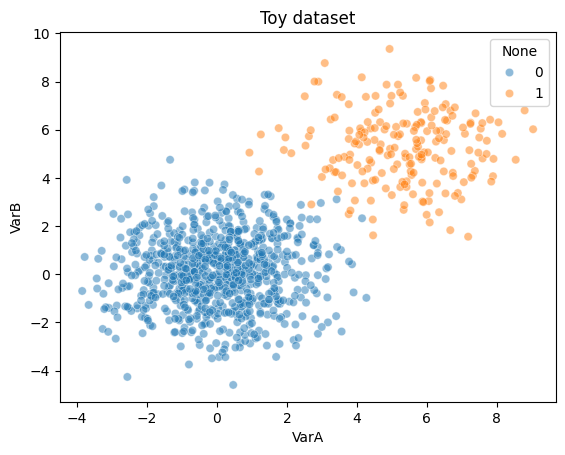

In [15]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

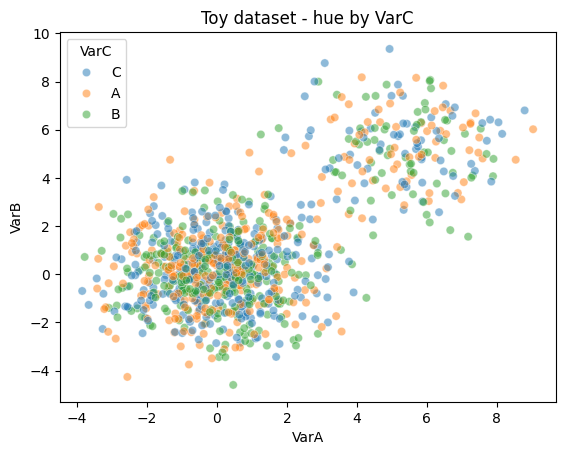

In [16]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarC', alpha=0.5
)

plt.title('Toy dataset - hue by VarC')
plt.show()

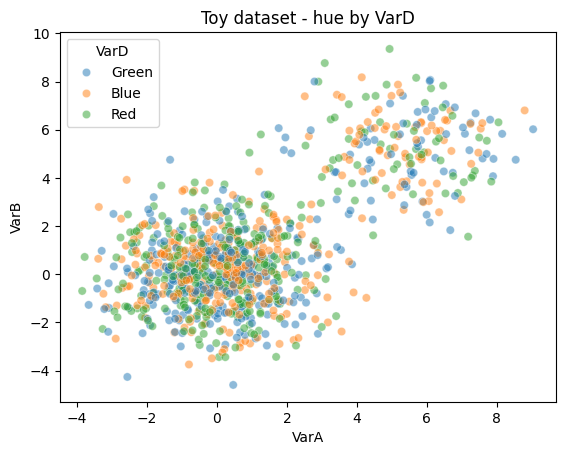

In [17]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarD', alpha=0.5
)

plt.title('Toy dataset - hue by VarD')
plt.show()

## SMOTE-NC

[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [18]:
## Yêu cầu 4
## VIẾT CODE Ở ĐÂY:
smnc = SMOTENC(
    sampling_strategy='auto', # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    n_jobs=4,
    categorical_features=[2,3] # chỉ số của cột có các biến hạng mục
)  

X_res, y_res = smnc.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:619: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[SMOTENC()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

</details>

In [22]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 4), (1000,))

In [23]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 4), (1600,))

In [21]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 5
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

In [24]:
X.tail()

,VarA,VarB,VarC,VarD
179,3.767330,7.058810,A,Red
1328,5.235554,7.548144,A,Blue
385,1.253665,5.803014,B,Red
1584,3.814765,2.645328,B,Green
1126,6.482753,4.269992,C,Green


In [25]:
X_res.tail()

,VarA,VarB,VarC,VarD
1595,6.467539,6.840338,C,Green
1596,6.596235,6.460709,B,Blue
1597,6.073876,7.063644,A,Red
1598,4.623880,6.806784,A,Blue
1599,4.820982,5.644708,B,Blue


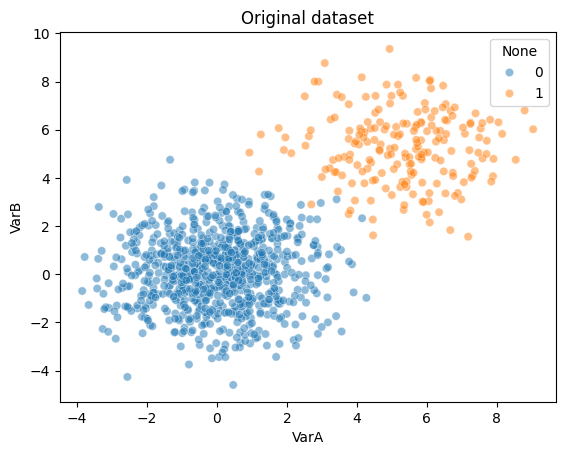

In [27]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 6
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

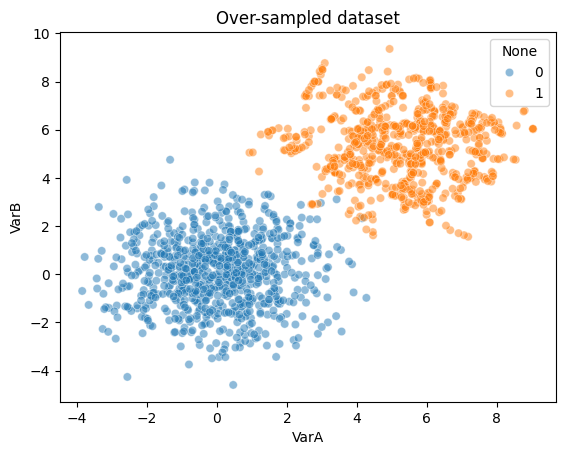

In [26]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 7
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

Các quan sát mới khác với các quan sát ban đầu.

# SMOTE đường biên (BorderlineSMOTE)

Tạo mẫu mới bằng cách nội suy mẫu của lớp đa số và các neighbour gần nhất của nó. Nó không sử dụng toàn bộ quan sát của lớp thiểu số làm khuôn mẫu giống như SMOTE, mà trước tiên nó sẽ chọn các quan sát có phần lớn neighbour thuộc lớp đa số rồi dùng chúng làm khuôn mẫu để tạo dữ liệu tổng hợp.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import BorderlineSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [29]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
## Yêu cầu 8
## VIẾT CODE Ở ĐÂY:
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

<details><summary> Gợi ý </summary>

Sử dụng ```make_blobs()```

</details>

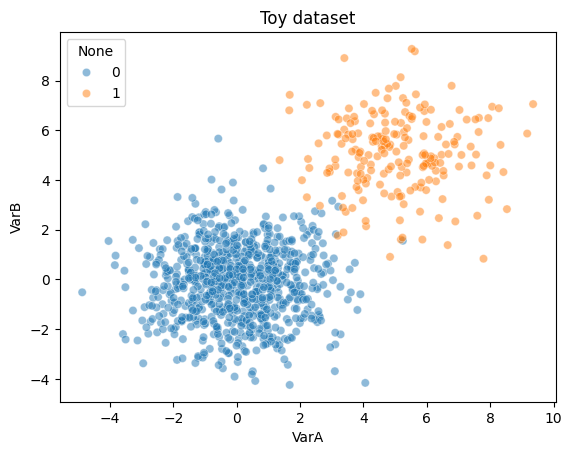

In [30]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## BorderlineSMOTE

[BorderlineSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

In [31]:
## Yêu cầu 9
## VIẾT CODE Ở ĐÂY:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[BorderlineSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

</details>

In [32]:
## Yêu cầu 10
## VIẾT CODE Ở ĐÂY:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[BorderlineSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

</details>

In [33]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [34]:
# kích thước dữ liệu undersampled

X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [35]:
# kích thước dữ liệu undersampled

X_res_b2.shape, y_res_b2.shape

((1599, 2), (1599,))

In [36]:
# số lượng quan sát của lớp thiểu số
## Yêu cầu 11
## VIẾT CODE Ở ĐÂY:
y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64,
 0    800
 1    799
 dtype: int64)

<details><summary> Gợi ý </summary>

Sử dụng ```value_counts()```

</details>

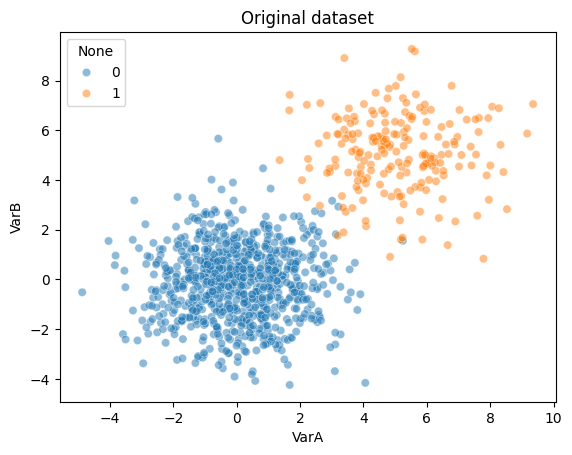

In [38]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 12
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

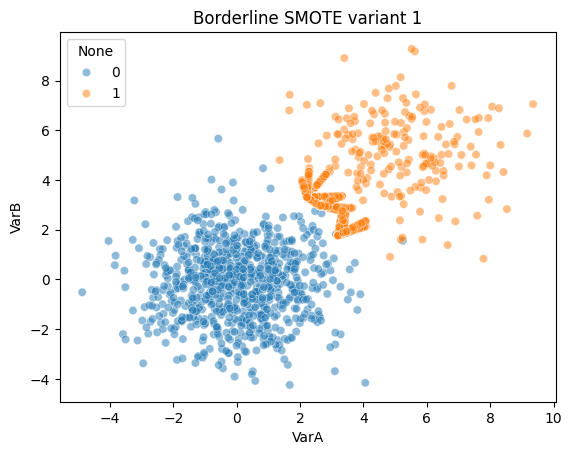

In [37]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 13
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res_b1, x="VarA", y="VarB", hue=y_res_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

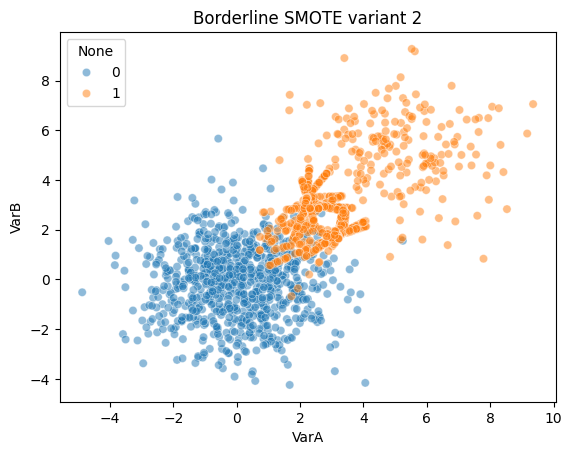

In [39]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 14
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res_b2, x="VarA", y="VarB", hue=y_res_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()

Chúng ta thấy rằng nếu sử dụng variant 2 thì chúng ta sẽ tạo ra nhiều dữ liệu tổng hợp hơn hướng tới lớp đa số.

**BÀI TẬP**

- Kiểm tra SMOTE đường biên sử dụng tập dữ liệu giả lập mà chúng ta đã tạo và xem phân phối của dữ liệu mới tạo thay đổi thế nào với các phân tách lớp khác nhau.

# SVM-SMOTE

Tạo mẫu mới bằng cách nội suy các mẫu của vectơ hỗ trợ từ lớp thiểu số và các neighbour gần nhất của nó.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [42]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

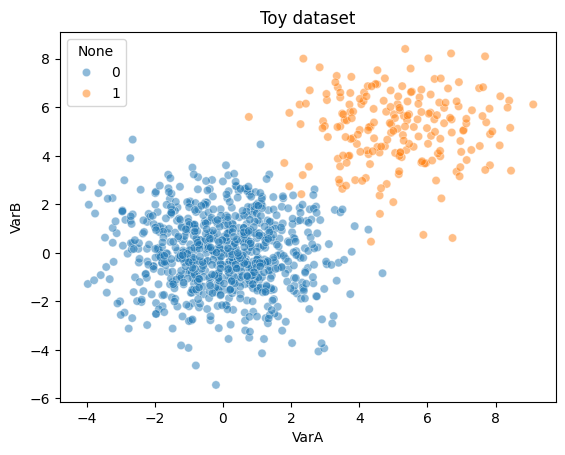

In [43]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Tìm vectơ hỗ trợ

In [44]:
# Khởi tạo bộ phân loại SVM
## Yêu cầu 15
## VIẾT CODE Ở ĐÂY:
clf = svm.SVC(kernel='linear')

# Khớp dữ liệu
clf = clf.fit(X, y)

# vectơ hỗ trợ, chỉ số 
clf.support_

array([ 23,  29, 109, 146, 476, 481, 588, 680, 690, 819, 856, 863, 882,
       886, 915, 949, 958, 961])

<details><summary> Gợi ý </summary>

[SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

</details>

In [45]:
# số lượng vectơ hỗ trợ
## Yêu cầu 16
## VIẾT CODE Ở ĐÂY:
len(clf.support_)

18

<details><summary> Gợi ý </summary>

Sử dụng ```support_```

</details>

In [46]:
# vectơ hỗ trợ
## Yêu cầu 17
## VIẾT CODE Ở ĐÂY:
clf.support_vectors_

array([[2.68714064, 2.61730021],
       [1.3604629 , 3.22916765],
       [2.6509921 , 2.38223267],
       [3.28260188, 1.77018523],
       [3.86429284, 1.10122981],
       [4.26755128, 0.9582712 ],
       [3.44459348, 1.67093298],
       [1.10259894, 4.46897308],
       [3.50661962, 1.78943363],
       [2.34072028, 3.20621229],
       [2.30091041, 2.41807541],
       [4.60515581, 1.60748422],
       [1.800359  , 3.70440125],
       [2.52210781, 3.55276519],
       [5.87931802, 0.74205505],
       [3.5016074 , 2.63777913],
       [1.9469038 , 2.7449093 ],
       [4.34281847, 0.46153998]])

<details><summary> Gợi ý </summary>

Sử dụng ```support_vectors_```

</details>

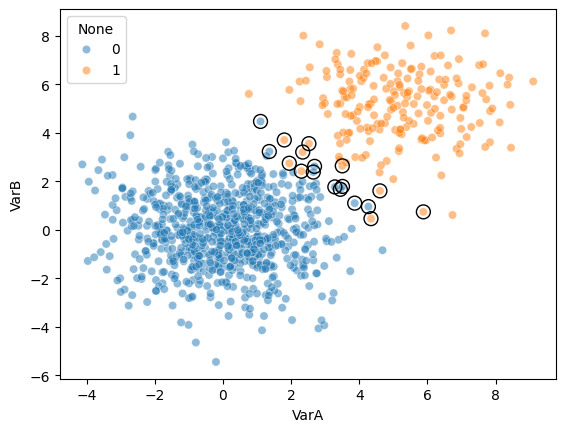

In [47]:
# đánh dấu các vectơ hỗ trợ

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

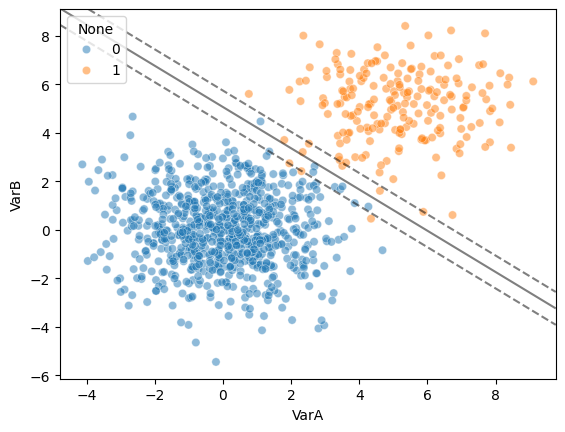

In [48]:
# vẽ biểu đồ ranh giới quyết định
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# thêm ranh giới quyết định
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## SVM SMOTE

[SVMSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [49]:
## Yêu cầu 18
## VIẾT CODE Ở ĐÂY:
sm = SVMSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=4,
    svm_estimator = svm.SVC(kernel='linear')
)

X_res, y_res = sm.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

[SVMSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SVMSMOTE.html)

</details>

In [50]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [51]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [52]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

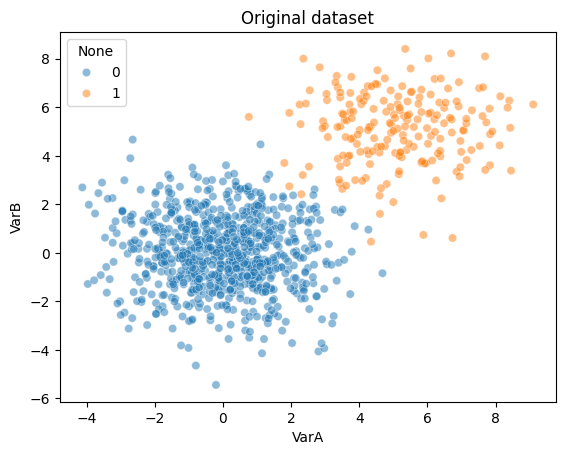

In [53]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 19
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

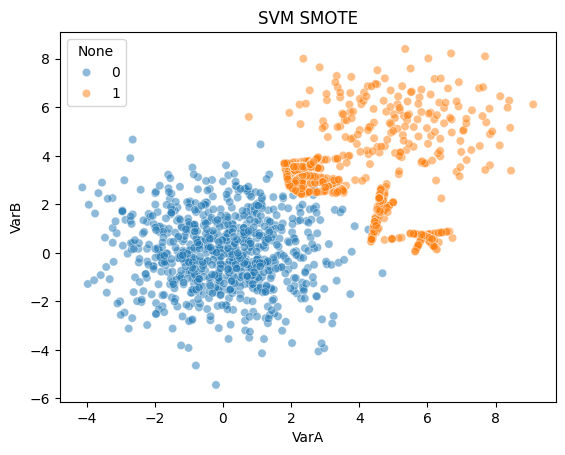

In [54]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 20
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

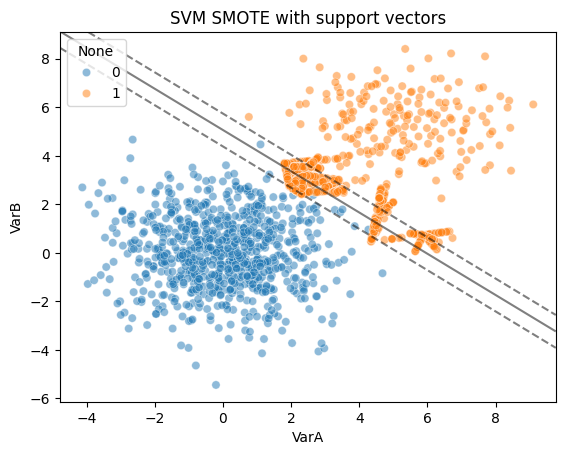

In [55]:
# biểu đồ dữ liệu đã chọn

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# thêm ranh giới quyết định
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()

Chúng ta thấy rằng đa số các mẫu tổng hợp được tạo gần hơn với các vectơ hỗ trợ từ lớp thiểu số.

**BÀI TẬP**

- Kiểm tra SVM SMOTE sử dụng tập dữ liệu giả lập mà chúng ta đã tạo và xem phân phối của dữ liệu mới tạo thay đổi thế nào với các phân tách lớp khác nhau.

# K-Means SMOTE

Tạo mẫu mới bằng cách nội suy các mẫu với SMOTE trong các cụm đã chọn.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from imblearn.over_sampling import KMeansSMOTE

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [57]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5), (0,5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 2100

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# số mẫu trên blob khác nhau
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(400, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

# đặt lại index
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

             
# tạo mục tiêu mất cân bằng
y = pd.concat([
    pd.Series(np.random.binomial(1, 0.3, 700)),
    pd.Series(np.random.binomial(1, 0.2, 400)),
    pd.Series(np.random.binomial(1, 0.1, 100)),
], axis=0).reset_index(drop=True)

# hiển thị kích thước
X.shape, y.shape

((1200, 2), (1200,))

In [58]:
y.value_counts()

0    897
1    303
dtype: int64

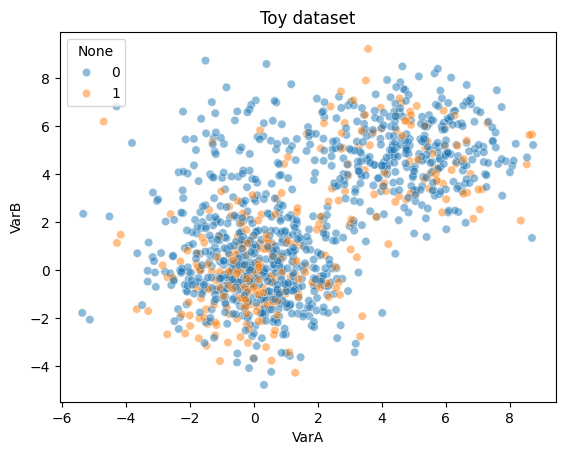

In [59]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## K-Means SMOTE

[KMeansSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

In [60]:
## Yêu cầu 21
## VIẾT CODE Ở ĐÂY:
sm = KMeansSMOTE(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
    k_neighbors=2,
    n_jobs=None,
    kmeans_estimator=KMeans(n_clusters=3, random_state=0),
    cluster_balance_threshold=0.1,
    density_exponent='auto'
)

X_res, y_res = sm.fit_resample(X, y)

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<details><summary> Gợi ý </summary>

[KMeansSMOTE()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

</details>

In [61]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1200, 2), (1200,))

In [ ]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

In [62]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    897
 1    303
 dtype: int64,
 1    898
 0    897
 dtype: int64)

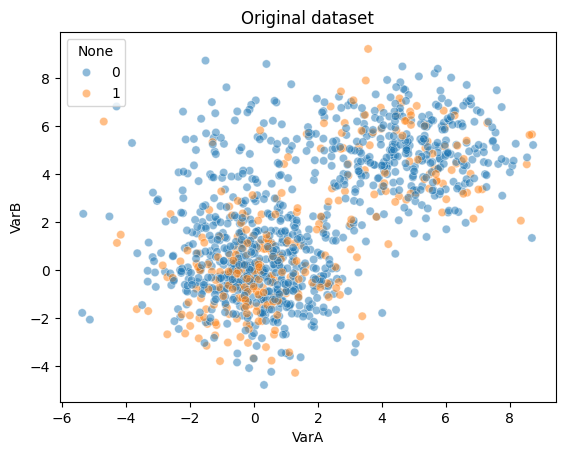

In [63]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 22
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

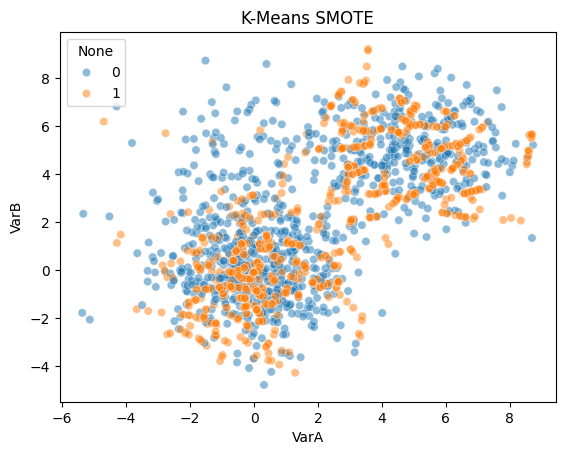

In [64]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 23
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('K-Means SMOTE')
plt.show()